In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from efficientnet_pytorch import EfficientNet
import torch

In [3]:
model_name = 'efficientnet-b0'
batch_size = 64
lr = 0.000025
num_epoch = 40
target = 'mask'
split = 20

df_train_path = f'df/df_mask_gender_train_{split}.csv'
df_valid_path = f'df/df_mask_gender_valid_{split}.csv'
df_test_path = '/opt/ml/input/data/eval/info.csv'

In [ ]:
device = 'cuda'
model = EfficientNet.from_pretrained(model_name, num_classes=3)
model.load_state_dict(torch.load('/opt/ml/code/save/mask/best_20_log1.pt'))
model.to(device)
print('model ready')

Loaded pretrained weights for efficientnet-b0
model ready


In [13]:
from dataset import get_test_dataset
from torch.utils.data import DataLoader

In [15]:
df_test = pd.read_csv(df_test_path)
ds = get_test_dataset(df_test)
dl = DataLoader(ds, batch_size = batch_size, shuffle=False)

In [17]:
model.eval()

label = []

for inputs in dl:

    inputs = inputs.to(device)

    with torch.no_grad():
        
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        label.extend(preds.tolist())

In [18]:
np_label = np.array(label)

In [23]:
np_label

array([2, 0, 2, ..., 1, 0, 1])

In [424]:
normal_idx = np.flatnonzero(np_label == 1)

In [425]:
len(normal_idx)

1833

In [21]:
12600/7

1800.0

In [429]:
i = -10

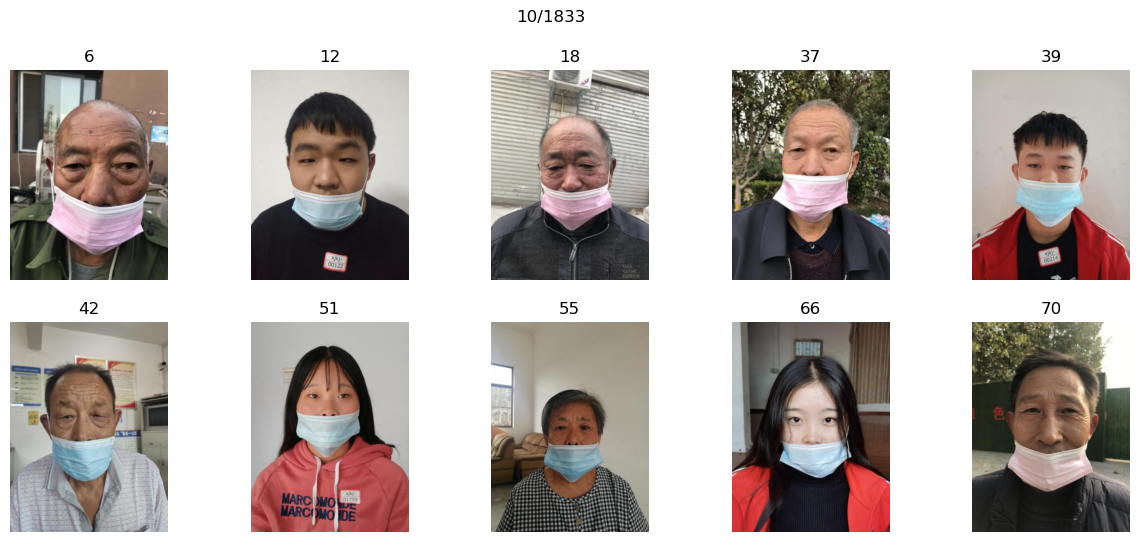

In [430]:
i += 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle(f'{i+10}/{len(normal_idx)}')
for ax, idx in zip(axes.flatten(), normal_idx[i:i+10]):
    img = Image.open(os.path.join('/opt/ml/input/data/eval/images', df_test.iloc[idx]['ImageID']))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'{idx}')
plt.show()

7958 => incorrect

< incorrect => wear >

애매 : 39,

In [362]:
import pickle
with open('normal.pkl', 'wb') as f:
    pickle.dump(np_label, f)

In [3]:
def query(path):

        fig, axes = plt.subplots(1, 7, figsize=(16, 3), facecolor=self.facecolor)
        fig.suptitle(path)

        for ax in axes.flatten():
            ax.axis('off')

        path = os.path.join('opt/ml/input/data/eval/images', path)
        imshow()

        plt.show()

In [99]:
np.random.choice(['mask1', 'mask2', 'mask3', 'mask4'], 2, replace=False)

array(['mask4', 'mask2'], dtype='<U5')

In [4]:
test_df = pd.read_csv(os.path.join('/opt/ml/input/data/eval', 'info.csv'))

In [5]:
iter = test_df.iterrows():
    row.ImageID

In [2]:
df_all = pd.read_csv(os.path.join('/opt/ml/input/data/train', 'train.csv'))
del df_all['race']
del df_all['id']

In [3]:
## 남자 여자 따로 나눔

df_male = df_all[df_all['gender'] == 'male']
df_female = df_all[df_all['gender'] == 'female']

In [94]:
np.random.rand()

0.9204589495433874

In [20]:
c = Checker(test_df)

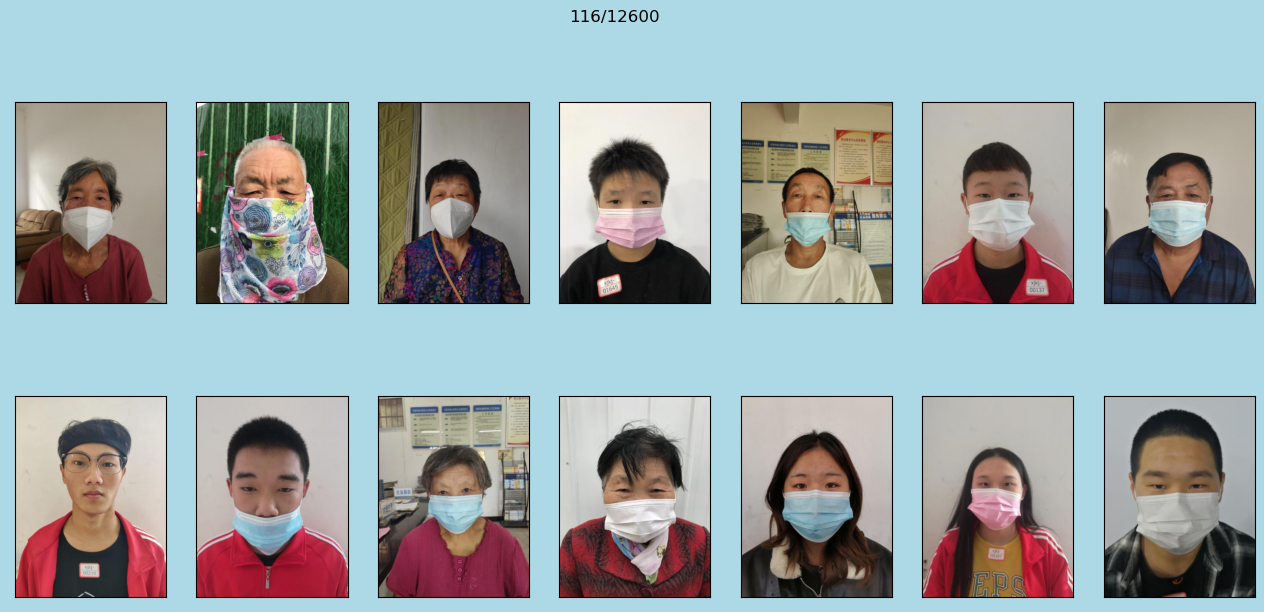

In [78]:
c.next_page()

In [16]:
class Checker:
    
    mask_label = ['normal', 'incorrect', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5']
    train_data_path = '/opt/ml/input/data/train'
    
    def __init__(self, df, facecolor='lightblue'):
        self.df = df
        self.iterator = df.iterrows()
        self.cnt = 0
        self.facecolor=facecolor
    
    def goto(self, cnt):
        self.cnt = 0
        self.iterator = self.df.iterrows()
        for _ in range(cnt-1):
            next(self.iterator)
            self.cnt += 1

    def next_page(self):
        
        self.cnt += 2
        fig, axes = plt.subplots(2, 7, figsize=(16, 7), facecolor=self.facecolor)
        fig.suptitle(f'{self.cnt}/{len(self.df)}')

        for ax in axes.flatten():
            ax.set_xticks([])
            ax.set_yticks([])
            _, row = next(self.iterator)
            path_ = row.ImageID
            img = Image.open(os.path.join('/opt/ml/input/data/eval/images', path_))
            ax.imshow(img)

        plt.show()
        
    def query(self, path):

        fig, axes = plt.subplots(1, 7, figsize=(16, 3), facecolor=self.facecolor)
        fig.suptitle(path)

        for ax in axes.flatten():
            ax.axis('off')

        path = os.path.join(self.train_data_path, 'images', path)
        files = os.listdir(path)
        for j, mask in enumerate(self.mask_label):
            ax = axes[j]
            for f in files:
                if f.startswith(mask):
                    img = Image.open(os.path.join(path,f))
                    ax.set_title(mask)
                    ax.imshow(img)

        plt.show()

In [5]:
## 원하는 dataframe을 넣어주시면 됩니다. 눈의 보호를 위해 바탕색을 설정할수있습니다.

checker = Checker(df_male, facecolor='lightblue')

000004_male_Asian_54
000012_male_Asian_57


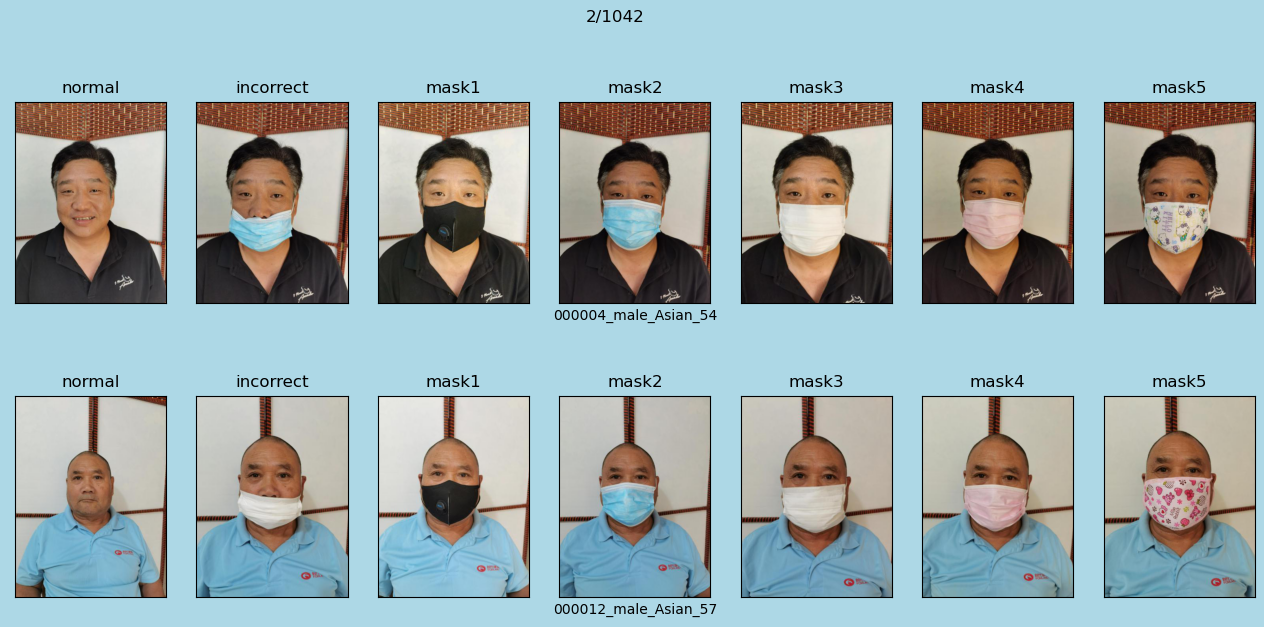

In [6]:
# 이걸 계속 실행시키면 1번째 이미지에서부터 마지막 이미지까지 2개씩 볼수 있습니다.

checker.next_page()

000231_male_Asian_56
000232_male_Asian_53


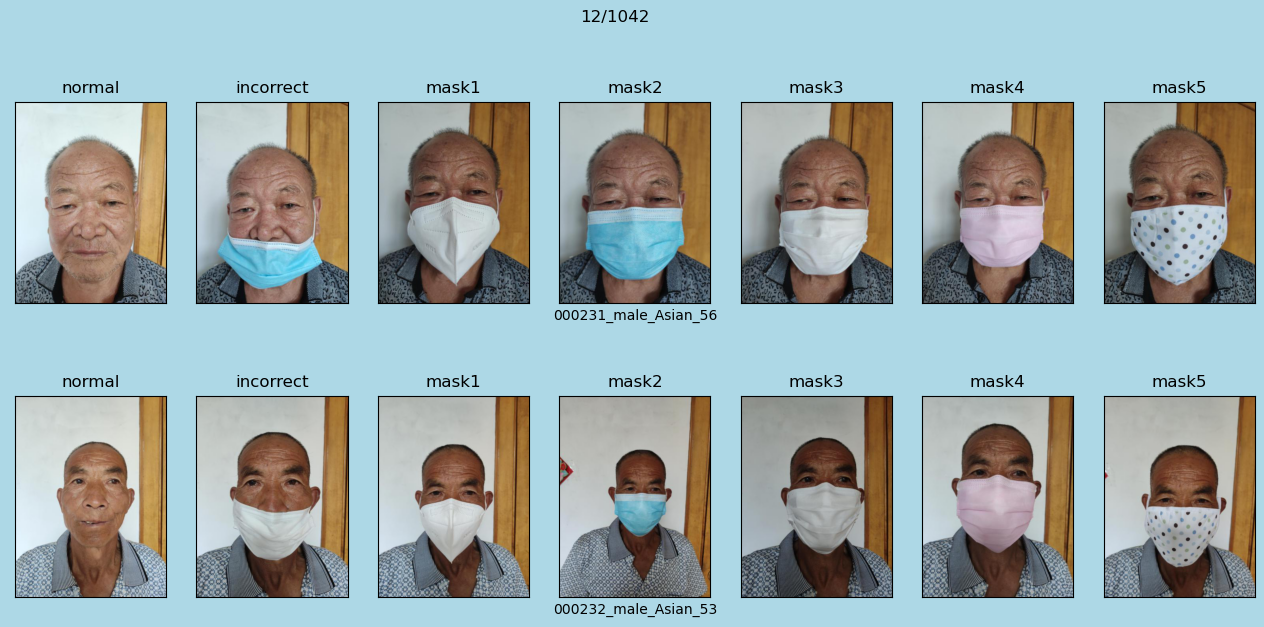

In [7]:
## checker.goto(n) 실행시키고 checker.next_page()하면 n번쨰와 n+1번째 이미지를 볼 수 있습니다. n은 1부터 시작합니다. 

checker.goto(11)
checker.next_page()

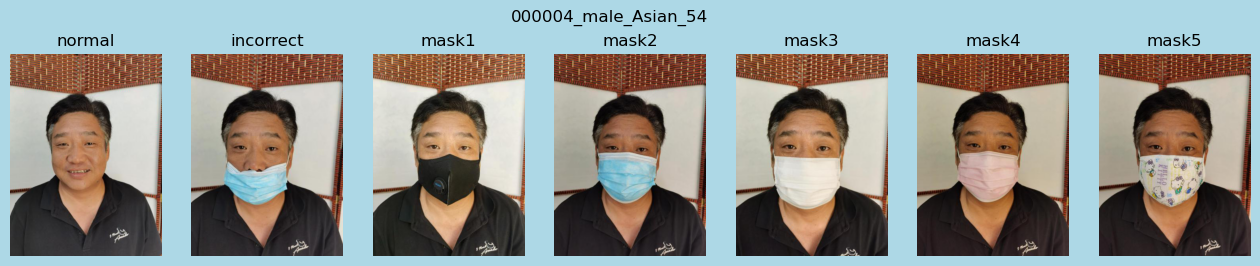

In [8]:
# 특정 인물을 다시보고 싶으면 checker.query(path)를 넣으면 됩니다!

checker.query('000004_male_Asian_54')

## # df_male Possible 오류

001498-1_male_Asian_23 => 여자같은디요?

003574_male_Asian_54 => 마스크 잘 낌

003823_male_Asian_48 => 잘 낀듯?

004413_male_Asian_18 => 확실히 잘낀거 아닌가?

004418_male_Asian_20 => normal, incorrect 바뀜

004432_male_Asian_43 => 여자같은디..

005223_male_Asian_22 => 남자 맞음?

005227_male_Asian_22 => normal, incorrect 바뀜